In [1]:
import os
import pandas as pd

In [2]:
# Set parameters:
BASE_DIR = "input/"
columns = ['Text', 'Class']
base = pd.DataFrame(columns=columns)

# Embedding
max_features = 5000
maxlen = 400

# Training
batch_size = 32
epochs = 3

In [3]:
dfs = []
for file in os.listdir(BASE_DIR):
    path = os.path.join(BASE_DIR, file)
    df = pd.read_csv(path, sep="\t", header=None, names=columns)
    dfs.append(df)
base = pd.concat(dfs, ignore_index=True)

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

### Multiclass Logistic Regression

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(base.Text, base.Class, test_size=0.2, random_state=0)

In [6]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_matrix(X_train, mode='binary')
X_test = tokenizer.texts_to_matrix(X_test, mode='binary')

Using TensorFlow backend.


In [7]:
import numpy as np
num_classes = np.max(y_train) + 1

In [8]:
import keras

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(512, input_shape=(max_features,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)

Train on 1978 samples, validate on 220 samples
Epoch 1/3
1978/1978 [==============================] - 3s 2ms/step - loss: 0.6310 - acc: 0.6810 - val_loss: 0.5592 - val_acc: 0.7364
Epoch 2/3
1978/1978 [==============================] - 3s 1ms/step - loss: 0.3614 - acc: 0.8979 - val_loss: 0.5015 - val_acc: 0.7636
Epoch 3/3
1978/1978 [==============================] - 3s 1ms/step - loss: 0.1776 - acc: 0.9590 - val_loss: 0.5117 - val_acc: 0.7818


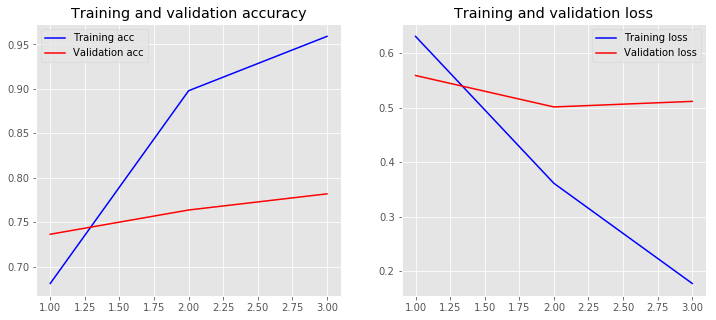

In [12]:
plot_history(history)

In [11]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9641
Testing Accuracy:  0.8509


### LSTM model

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(base.Text, base.Class, test_size=0.2, random_state=0)

In [14]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [15]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Train on 2198 samples, validate on 550 samples
Epoch 1/3
2198/2198 [==============================] - 54s 25ms/step - loss: 0.6677 - acc: 0.6187 - val_loss: 0.5485 - val_acc: 0.7800
Epoch 2/3
2198/2198 [==============================] - 56s 25ms/step - loss: 0.4067 - acc: 0.8399 - val_loss: 0.4111 - val_acc: 0.8200
Epoch 3/3
2198/2198 [==============================] - 56s 25ms/step - loss: 0.1994 - acc: 0.9327 - val_loss: 0.4219 - val_acc: 0.8236


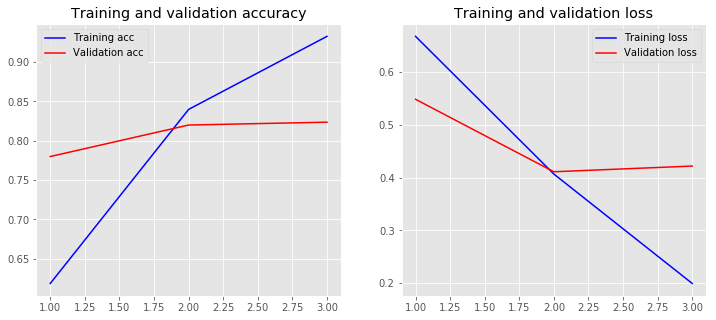

In [19]:
plot_history(history)

In [18]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9800
Testing Accuracy:  0.8236


### Bidirectional LSTM model

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(base.Text, base.Class, test_size=0.2, random_state=0)

In [21]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [22]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [23]:
import numpy as np
y_train = np.array(y_train)
y_test = np.array(y_test)

In [24]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=[X_test, y_test])

Train on 2198 samples, validate on 550 samples
Epoch 1/3
2198/2198 [==============================] - 53s 24ms/step - loss: 0.6804 - acc: 0.5523 - val_loss: 0.6218 - val_acc: 0.7182
Epoch 2/3
2198/2198 [==============================] - 50s 23ms/step - loss: 0.4614 - acc: 0.8157 - val_loss: 0.4175 - val_acc: 0.8255
Epoch 3/3
2198/2198 [==============================] - 51s 23ms/step - loss: 0.2013 - acc: 0.9399 - val_loss: 0.4105 - val_acc: 0.8509


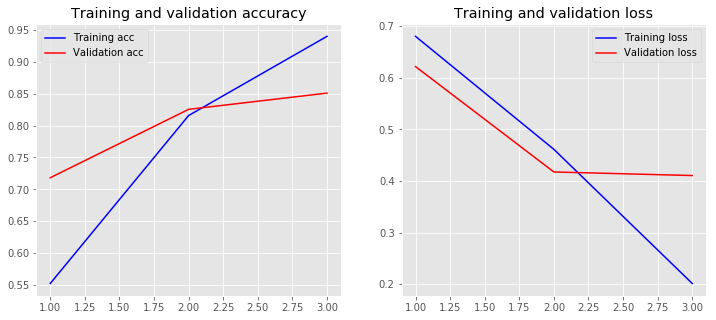

In [27]:
plot_history(history)

In [26]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.2f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.2f}".format(accuracy))

Training Accuracy: 0.98
Testing Accuracy:  0.85


### CNN

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(base.Text, base.Class, test_size=0.2, random_state=0)

In [29]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

In [30]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [31]:
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250

In [32]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D

model = Sequential()
model.add(Embedding(vocab_size, embedding_dims, input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

Train on 2198 samples, validate on 550 samples
Epoch 1/3
2198/2198 [==============================] - 15s 7ms/step - loss: 0.6913 - acc: 0.5287 - val_loss: 0.6671 - val_acc: 0.7109
Epoch 2/3
2198/2198 [==============================] - 15s 7ms/step - loss: 0.4976 - acc: 0.8035 - val_loss: 0.3683 - val_acc: 0.8582
Epoch 3/3
2198/2198 [==============================] - 15s 7ms/step - loss: 0.2202 - acc: 0.9263 - val_loss: 0.3603 - val_acc: 0.8636


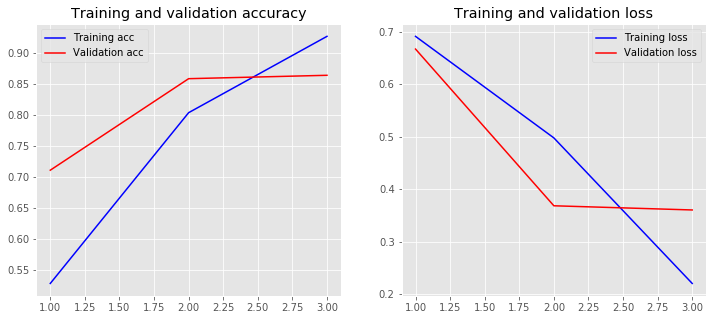

In [35]:
plot_history(history)

In [34]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9763
Testing Accuracy:  0.8636
